In [1]:
import pandas as pd
import numpy as np
import tqdm
import warnings
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

pd.set_option("max_rows", 200)
pd.set_option("max_columns", 50)
tqdm.tqdm.pandas()
%matplotlib inline

In [2]:
df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle").sort_values(["user_id", "timestamp"]).reset_index(drop=True)

In [3]:
import sys
sys.path.append("..")

In [4]:
from feature_engineering.feature_factory import UserContentRateEncoder, FeatureFactoryManager
from experiment.common import get_logger

In [5]:

feature_factory_dict = {"user_id": {}, ("user_id", "part"): {}}
logger = get_logger()
feature_factory_dict["user_id"]["UserContentRateEncoder"] = UserContentRateEncoder(column="user_id",
                                                                                   rate_func="elo")
feature_factory_dict[("user_id", "part")] = {
    "UserContentRateEncoder": UserContentRateEncoder(column=["user_id", "part"],
                                                     rate_func="elo")
}

feature_factory_manager = FeatureFactoryManager(feature_factory_dict=feature_factory_dict,
                                                logger=logger,
                                                split_num=10,
                                                model_id="train_0",
                                                load_feature=True,
                                                save_feature=True)

In [6]:
import sys
sys.path.append("../")
# df = pd.read_pickle("../input/riiid-test-answer-prediction/split10/train_0.pickle")
df = df.sort_values(["user_id", "timestamp"])
# large_user_id = df["user_id"].value_counts()
# large_user_id = large_user_id[large_user_id > 1000] 
# df = df[df["user_id"].isin(large_user_id.index)]
# df = df[df["answered_correctly"] != -1]

In [7]:
df["answered_correctly"] = df["answered_correctly"].replace(-1, np.nan)

In [8]:
df = feature_factory_manager.all_predict(df)

2020-12-07 19:47:54,323|INFO| load_feature from ../input/feature_engineering/user_content_rate_encoder_user_id_elo_rate_dict.pickle/model_id_train_0.pickle
2020-12-07 19:47:54,536|INFO| load_feature from ../input/feature_engineering/user_content_rate_encoder_['user_id', 'part']_elo_rate_dict.pickle/model_id_train_0.pickle


In [9]:
df["user_id_rating_bin"] = df["user_id_rating"] // 100
df["content_rating_bin"] = df["content_rating"] // 100

In [10]:
df

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,question_id,...,tags,tag,type_of,content_rating,user_id_rating,rating_diff_content_user_id,"['user_id', 'part']_rating","rating_diff_content_['user_id', 'part']",user_id_rating_bin,content_rating_bin
0,0,24600,7900,0,0,0,1.0,NaN,NaN,7900,...,131 93 81,-1,NaN,1209,1500,-291,1500,-293,15,12
1,25379,24600,7876,0,1,2,0.0,24000.0,False,7876,...,10 94 92,-1,NaN,1558,1502,56,1502,49,15,15
2,50137,24600,175,0,2,2,1.0,23000.0,False,175,...,9 10 92,-1,NaN,1620,1496,124,1495,114,14,16
3,70181,24600,1278,0,3,3,1.0,22000.0,False,1278,...,143 140 81 29,-1,NaN,1340,1506,-166,1500,-166,15,13
4,148601,24600,2064,0,4,2,0.0,18000.0,False,2064,...,157 92 29,-1,NaN,1399,1510,-111,1500,-109,15,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10033861,55863864,2147481750,9980,0,45,2,1.0,3000.0,True,9980,...,79,-1,NaN,1153,1552,-399,1535,-393,15,11
10033862,55884826,2147481750,5528,0,46,2,1.0,28000.0,True,5528,...,14,-1,NaN,1359,1554,-195,1536,-193,15,13
10033863,55910967,2147481750,5279,0,47,3,1.0,14000.0,True,5279,...,177,-1,NaN,1155,1557,-402,1540,-394,15,11
10033864,55938555,2147481750,5222,0,48,1,0.0,20000.0,True,5222,...,175,-1,NaN,1493,1559,-66,1541,-66,15,14


In [15]:
df["rating_diff_content_user_id_bin"] = df["rating_diff_content_user_id"] // 100
df["['user_id', 'part']_rating_bin"] = df["['user_id', 'part']_rating"] // 100

In [12]:
df.groupby("rating_diff_content_user_id_bin")["answered_correctly"].describe()

,count,mean,std,min,25%,50%,75%,max
rating_diff_content_user_id_bin,,,,,,,,
-14,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
-13,12.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
-12,106.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
-11,604.0,0.993377,0.081176,0.0,1.0,1.0,1.0,1.0
-10,2882.0,0.997571,0.049232,0.0,1.0,1.0,1.0,1.0
-9,11088.0,0.991342,0.092649,0.0,1.0,1.0,1.0,1.0
-8,34901.0,0.988568,0.106311,0.0,1.0,1.0,1.0,1.0
-7,95809.0,0.979783,0.140744,0.0,1.0,1.0,1.0,1.0
-6,238617.0,0.961977,0.191253,0.0,1.0,1.0,1.0,1.0


In [14]:
df.columns

Index(['timestamp', 'user_id', 'content_id', 'content_type_id',
       'task_container_id', 'user_answer', 'answered_correctly',
       'prior_question_elapsed_time', 'prior_question_had_explanation',
       'question_id', 'bundle_id', 'correct_answer', 'part', 'tags', 'tag',
       'type_of', 'content_rating', 'user_id_rating',
       'rating_diff_content_user_id', '['user_id', 'part']_rating',
       'rating_diff_content_['user_id', 'part']', 'user_id_rating_bin',
       'content_rating_bin', 'rating_diff_content_user_id_bin'],
      dtype='object')

In [16]:
df.groupby(["['user_id', 'part']_rating_bin", "content_rating_bin"])["answered_correctly"].describe()

count      mean  \
['user_id', 'part']_rating_bin content_rating_bin                       
-1                             -1                       0.0       NaN   
 8                              7                      10.0  0.300000   
                                8                       8.0  0.250000   
                                9                      23.0  0.217391   
                                10                     34.0  0.264706   
                                11                     40.0  0.400000   
                                12                     17.0  0.352941   
                                13                     10.0  0.300000   
                                14                      2.0  0.000000   
 9                              6                       5.0  0.200000   
                                7                      21.0  0.380952   
                                8                      41.0  0.243902   
                                9                      91.0  0.208791   
                                10                    167.0  0.311377   
                                11                    240.0  0.283333   
                                12                    279.0  0.293907   
                                13                    286.0  0.265734   
                                14                    227.0  0.220264   
                                15                    119.0  0.235294   
                                16                     57.0  0.263158   
                                17                     20.0  0.100000   
                                18                      1.0  0.000000   
                                19                      1.0  1.000000   
 10                             6                       6.0  0.833333   
                                7                      22.0  0.454545   
                                8                      88.0  0.250000   
                                9                     291.0  0.309278   
                                10                    848.0  0.273585   
                                11                   1717.0  0.279557   
                                12                   2474.0  0.248181   
                                13                   2836.0  0.253879   
                                14                   2574.0  0.255245   
                                15                   1692.0  0.234043   
                                16                    788.0  0.228426   
                                17                    325.0  0.209231   
                                18                     69.0  0.304348   
                                19                     20.0  0.450000   
                                20                      4.0  0.250000   
 11                             6                       1.0  1.000000   
                                7                      30.0  0.666667   
                                8                     134.0  0.507463   
                                9                     499.0  0.525050   
                                10                   1434.0  0.450488   
                                11                   3324.0  0.392900   
                                12                   4979.0  0.332396   
                                13                   5726.0  0.298289   
                                14                   5220.0  0.272797   
                                15                   3580.0  0.257821   
                                16                   1593.0  0.252982   
                                17                    626.0  0.234824   
                                18                    185.0  0.264865   
                                19                     40.0  0.300000   
                                20                      8.0  0.250000   
 12                             6      

In [18]:
df_oof_lgbm = pd.read_csv("../output/ex_172/20201202080625/oof_train_0_lgbm.csv")
df_oof_lgbm.columns = ["index", "predict", "target"]

In [19]:
df = pd.merge(df.reset_index(), df_oof_lgbm, how="inner")

In [25]:
df.groupby(["content_rating_bin"]).agg({"answered_correctly": ["count", "mean"], "predict": ["mean"]})

answered_correctly             predict
                                count      mean      mean
content_rating_bin                                       
6                                 392  0.997449  0.987759
7                                1685  0.981602  0.980974
8                                6807  0.965036  0.969405
9                               21314  0.945435  0.948594
10                              57688  0.912893  0.918579
11                             152047  0.862806  0.867879
12                             267628  0.797988  0.803134
13                             385405  0.717149  0.722521
14                             395032  0.625187  0.629455
15                             301419  0.518912  0.523960
16                             161870  0.391203  0.394465
17                              62332  0.286402  0.293837
18                              10074  0.223546  0.222876
19                               1329  0.174567  0.165959
20                                175  0.131429  0.109499

In [27]:
df.groupby(["user_id_rating_bin"]).agg({"answered_correctly": ["count", "mean"], "predict": ["mean"]})

answered_correctly             predict
                                count      mean      mean
user_id_rating_bin                                       
10                                781  0.275288  0.263261
11                               6868  0.285090  0.291127
12                              23701  0.424919  0.430051
13                             121872  0.525281  0.532148
14                             494356  0.578537  0.585889
15                             656439  0.662624  0.666824
16                             366474  0.728878  0.733076
17                             128760  0.798711  0.797751
18                              24096  0.861554  0.862120
19                               1850  0.908649  0.911186

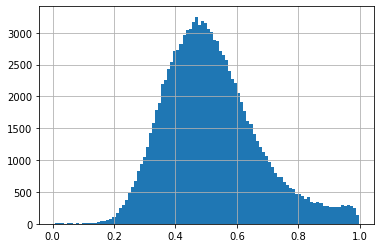

In [33]:
df[(df["user_id_rating_bin"] == 15) & (df["content_rating_bin"] == 15)]["predict"].hist(bins=100)

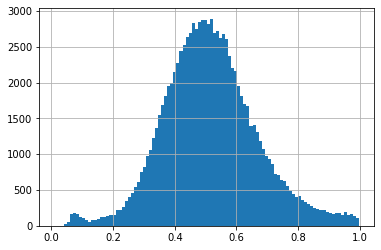

In [34]:
df[(df["user_id_rating_bin"] == 14) & (df["content_rating_bin"] == 14)]["predict"].hist(bins=100)

In [38]:
df[(df["user_id_rating_bin"] == 15) & (df["content_rating_bin"] == 15) & (df["predict"] > 0.9)].sort_values("timestamp")

,index,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,...,user_id_rating,rating_diff_content_user_id,"['user_id', 'part']_rating","rating_diff_content_['user_id', 'part']",user_id_rating_bin,content_rating_bin,rating_diff_content_user_id_bin,"['user_id', 'part']_rating_bin",predict,target
1429267,7766469,292277,1656040300,2595,0,7,0,1.0,18000.0,False,...,1595,-86,1554,-51,15,15,-1,15,0.900131,1.0
536347,2988440,300605,636124920,8561,0,11,1,1.0,10000.0,True,...,1512,15,1510,7,15,15,0,15,0.937014,1.0
710554,3970516,336973,847986120,2595,0,7,0,1.0,21333.0,False,...,1598,-89,1555,-52,15,15,-1,15,0.926610,1.0
1278706,6946678,340135,1478171060,3988,0,12,2,1.0,5000.0,True,...,1575,0,1562,-3,15,15,0,15,0.937730,1.0
972700,5361738,355618,1145528890,2595,0,7,0,1.0,26000.0,False,...,1570,-61,1541,-38,15,15,-1,15,0.902248,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245337,6764393,70518677273,1439625780,6895,0,1358,1,1.0,29000.0,False,...,1585,-30,1557,-61,15,15,-1,15,0.910020,1.0
941003,5162249,77679296087,1105035990,5335,0,264,2,1.0,31000.0,True,...,1540,43,1555,7,15,15,0,15,0.958823,1.0
988526,5469905,78235220576,1167501360,8748,0,3157,2,1.0,15000.0,True,...,1556,-43,1549,-59,15,15,-1,15,0.950368,1.0
256468,1450056,79949108001,311071830,1119,0,891,3,1.0,15000.0,True,...,1598,-11,1652,-99,15,15,-1,16,0.925348,1.0


In [39]:
for uid in [1656040300, 636124920, 847986120, 1478171060]:
    df[df["user_id"] == uid].to_csv(f"045_user-content_rate/{uid}.csv")